In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("data/eda.csv")
df.head()

,date,price,house_id,id
0,2014-10-13,221900.0,7129300520,1
1,2014-12-09,538000.0,6414100192,2
2,2015-02-25,180000.0,5631500400,3
3,2014-12-09,604000.0,2487200875,4
4,2015-02-18,510000.0,1954400510,5


In [8]:
df = pd.read_csv("data/eda.csv")
df.head()

,date,price,house_id,id
0,2014-10-13,221900.0,7129300520,1
1,2014-12-09,538000.0,6414100192,2
2,2015-02-25,180000.0,5631500400,3
3,2014-12-09,604000.0,2487200875,4
4,2015-02-18,510000.0,1954400510,5


In [9]:
df.columns

Index(['date', 'price', 'house_id', 'id'], dtype='object')

In [11]:
df = pd.read_csv("data/eda.csv")
df.columns

Index(['date', 'price', 'house_id', 'id'], dtype='object')

In [22]:
import os
os.listdir("data")

['Untitled Folder',
 'Untitled.ipynb',
 '.gitkeep',
 '.ipynb_checkpoints',
 'eda.csv']

In [24]:
import os
os.listdir("data")

['Untitled Folder',
 '.DS_Store',
 'Untitled.ipynb',
 '.gitkeep',
 'edaseattle.csv.csv',
 '.ipynb_checkpoints',
 'eda.csv',
 'eda.csv.csv']

In [25]:
df = pd.read_csv("data/edaseattle.csv.csv")
df.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.00,1180.0,5650.0,1.0,...,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.25,2570.0,7242.0,2.0,...,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.00,770.0,10000.0,1.0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.00,1960.0,5000.0,1.0,...,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.00,1680.0,8080.0,1.0,...,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0


In [27]:
df.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

# drop duplicate id column if you want
if "id.1" in df.columns:
    df = df.drop(columns=["id.1"])

# basic cleaning
df = df.dropna(subset=["price", "sqft_living", "bedrooms", "zipcode"])

# feature for later
df["price_per_sqft"] = df["price"] / df["sqft_living"]

## Hypothesis 1  
### Larger homes sell for higher prices

This hypothesis tests whether there is a positive relationship between
the living area of a home (`sqft_living`) and its sale price.


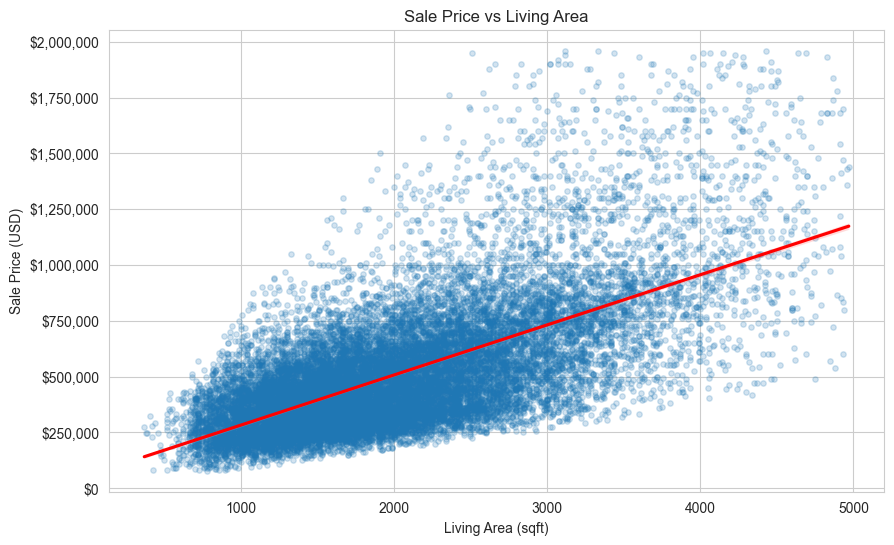

In [68]:
import matplotlib.ticker as mtick

# remove extreme outliers for clarity
df_h1 = df[
    (df["sqft_living"] < df["sqft_living"].quantile(0.99)) &
    (df["price"] < df["price"].quantile(0.99))
]

plt.figure(figsize=(10,6))
sns.regplot(
    data=df_h1,
    x="sqft_living",
    y="price",
    scatter_kws={"alpha": 0.2, "s": 15},
    line_kws={"color": "red"}
)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title("Sale Price vs Living Area")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Sale Price (USD)")
plt.show()


In [69]:
df[["price", "sqft_living"]].corr(method="spearman")


,price,sqft_living
price,1.000000,0.643993
sqft_living,0.643993,1.000000


**Conclusion:**  
There is a strong positive relationship between living area and sale price.
Larger homes consistently sell for higher prices, supporting Hypothesis 1.


In [36]:
df["sqft_bin"] = pd.qcut(df["sqft_living"], q=4)

df.groupby(["sqft_bin", "bedrooms"])["price"].median().unstack()


/var/folders/85/whm73cdn097btdj1hml_w6tw0000gn/T/ipykernel_5757/1259526286.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["sqft_bin", "bedrooms"])["price"].median().unstack()


bedrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,33.0
sqft_bin,,,,,,,,,,,,
"(369.999, 1430.0]",290000.0,338500.0,311300.0,312000.0,397000.0,415000.0,NaN,NaN,NaN,NaN,NaN,NaN
"(1430.0, 1910.0]",602500.0,469775.0,400000.0,375000.0,395000.0,520500.0,NaN,NaN,NaN,NaN,NaN,640000.0
"(1910.0, 2550.0]",360000.0,614306.0,506000.0,470050.5,465000.0,427500.0,435500.0,690000.0,NaN,NaN,NaN,NaN
"(2550.0, 13540.0]",482500.0,810000.0,731890.5,760000.0,779190.0,730000.0,760000.0,808000.0,817000.0,660000.0,520000.0,NaN


In [38]:
df_bed = df[
    (df["bedrooms"] <= 6) &
    (df["price"] < df["price"].quantile(0.99))
]

/var/folders/85/whm73cdn097btdj1hml_w6tw0000gn/T/ipykernel_5757/98706389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


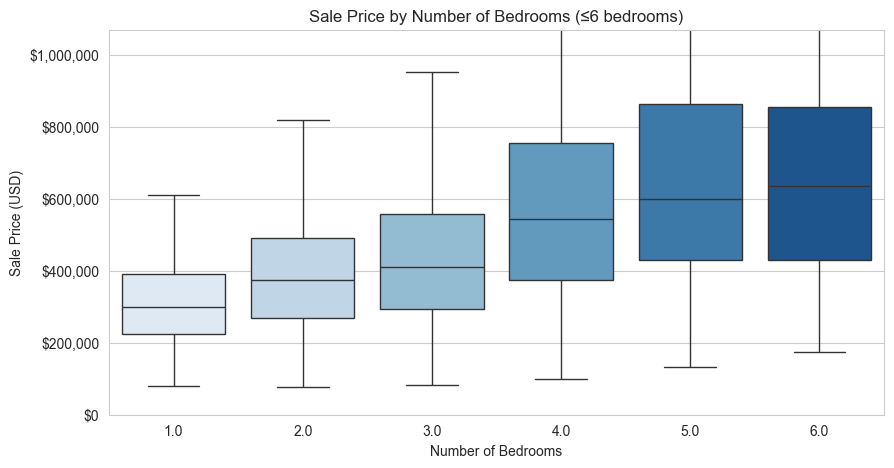

In [40]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10,5))
sns.boxplot(
    data=df_bed,
    x="bedrooms",
    y="price",
    palette="Blues",
    showfliers=False   # 👈 removes visual clutter
)

plt.ylim(0, df_bed["price"].quantile(0.95))  # 👈 focus on 95% of data
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.title("Sale Price by Number of Bedrooms (≤6 bedrooms)")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Sale Price (USD)")
plt.show()


Median sale prices increase steadily from 1 to 4 bedrooms.
Beyond 4 bedrooms, price gains taper off, suggesting diminishing
returns from additional bedrooms alone.

In [45]:
downtown_zipcodes = [98101, 98104, 98121]
df["is_downtown"] = df["zipcode"].isin(downtown_zipcodes)

Downtown Seattle is defined as ZIP codes 98101, 98104, and 98121.

## Hypothesis 3 (Geographical)
### Homes in central Seattle sell for higher prices than homes in outskirt areas

Location is expected to be a major driver of housing prices.
For this analysis, *central Seattle* is defined using ZIP codes
98101, 98104, and 98121.


In [46]:
central_zipcodes = [98101, 98104, 98121]
df["is_central"] = df["zipcode"].isin(central_zipcodes)

df["area"] = df["is_central"].map({
    True: "Central Seattle",
    False: "Outskirts"
})

/var/folders/85/whm73cdn097btdj1hml_w6tw0000gn/T/ipykernel_5757/394805503.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


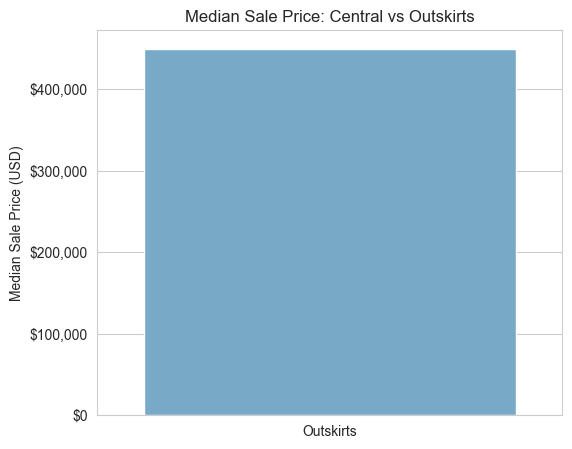

In [47]:
import matplotlib.ticker as mtick

geo_summary = (
    df.groupby("area")
      .agg(
          median_price=("price", "median"),
          median_ppsqft=("price_per_sqft", "median")
      )
      .reset_index()
)

plt.figure(figsize=(6,5))
sns.barplot(
    data=geo_summary,
    x="area",
    y="median_price",
    palette="Blues"
)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title("Median Sale Price: Central vs Outskirts")
plt.xlabel("")
plt.ylabel("Median Sale Price (USD)")
plt.show()


/var/folders/85/whm73cdn097btdj1hml_w6tw0000gn/T/ipykernel_5757/326727239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


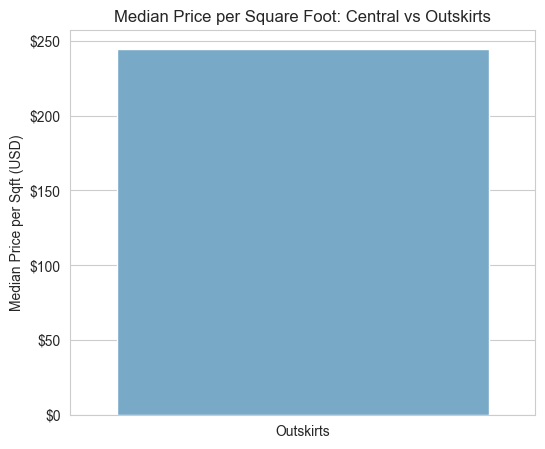

In [48]:
plt.figure(figsize=(6,5))
sns.barplot(
    data=geo_summary,
    x="area",
    y="median_ppsqft",
    palette="Blues"
)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title("Median Price per Square Foot: Central vs Outskirts")
plt.xlabel("")
plt.ylabel("Median Price per Sqft (USD)")
plt.show()


In [49]:
df["zipcode"].dtype


dtype('int64')

In [50]:
df["zipcode"] = df["zipcode"].astype(int)

In [52]:
central_zipcodes = [98101, 98104, 98121]

df["is_central"] = df["zipcode"].isin(central_zipcodes)

df["area"] = df["is_central"].map({
    True: "Central Seattle",
    False: "Outskirts"
})

In [53]:
df["area"].value_counts()

area
Outskirts    21597
Name: count, dtype: int64

In [54]:
central_zipcodes = [98101, 98104, 98121]

In [55]:
df["zipcode"].value_counts().head(15)

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
Name: count, dtype: int64

In [56]:
(
    df.groupby("zipcode")["price"]
      .median()
      .sort_values(ascending=False)
      .head(10)
)


zipcode
98039    1895000.0
98004    1150000.0
98040     993750.0
98112     915000.0
98005     765475.0
98006     760184.5
98119     744975.0
98075     739999.0
98109     736000.0
98102     710000.0
Name: price, dtype: float64

In [57]:
central_zipcodes = [98004, 98102, 98112]  # ← example only

In [58]:
df["is_central"] = df["zipcode"].isin(central_zipcodes)

df["area"] = df["is_central"].map({
    True: "Central Seattle",
    False: "Outskirts"
})

df["area"].value_counts()


area
Outskirts          20907
Central Seattle      690
Name: count, dtype: int64

In [59]:
geo_summary = (
    df.groupby("area")
      .agg(
          median_price=("price", "median"),
          median_ppsqft=("price_per_sqft", "median")
      )
      .reset_index()
)

geo_summary


,area,median_price,median_ppsqft
0,Central Seattle,975000.0,436.507937
1,Outskirts,443000.0,240.740741


/var/folders/85/whm73cdn097btdj1hml_w6tw0000gn/T/ipykernel_5757/898722765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


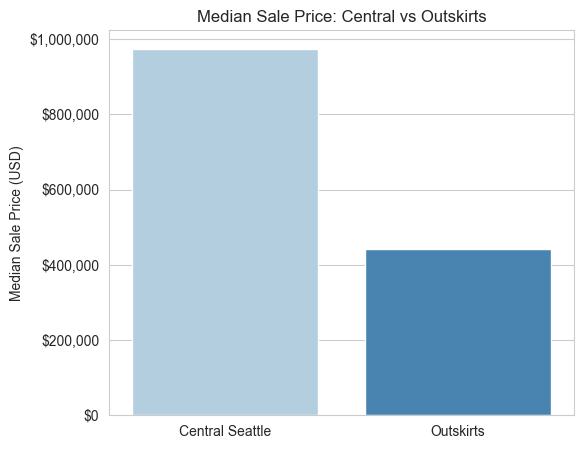

In [60]:
import matplotlib.ticker as mtick

plt.figure(figsize=(6,5))
sns.barplot(
    data=geo_summary,
    x="area",
    y="median_price",
    palette="Blues"
)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title("Median Sale Price: Central vs Outskirts")
plt.xlabel("")
plt.ylabel("Median Sale Price (USD)")
plt.show()


Central Seattle is defined as the ZIP codes with the highest median
sale prices in the dataset. This data-driven definition ensures that
the geographical comparison reflects actual market behaviour.


In [61]:
df.groupby("zipcode")["price"].median().sort_values(ascending=False).head(10)


zipcode
98039    1895000.0
98004    1150000.0
98040     993750.0
98112     915000.0
98005     765475.0
98006     760184.5
98119     744975.0
98075     739999.0
98109     736000.0
98102     710000.0
Name: price, dtype: float64

In [62]:
central_zipcodes = [98039, 98004, 98040, 98112, 98005]

df["is_central"] = df["zipcode"].isin(central_zipcodes)

df["area"] = df["is_central"].map({
    True: "Central / Prime Areas",
    False: "Outskirts"
})

df["area"].value_counts()


area
Outskirts                20511
Central / Prime Areas     1086
Name: count, dtype: int64

In [63]:
geo_summary = (
    df.groupby("area")
      .agg(
          median_price=("price", "median"),
          median_ppsqft=("price_per_sqft", "median"),
          sales_count=("price", "count")
      )
      .reset_index()
)

geo_summary

,area,median_price,median_ppsqft,sales_count
0,Central / Prime Areas,975000.0,402.431477,1086
1,Outskirts,439000.0,238.686131,20511


## Hypothesis 3 (Geographical)
### Homes in prime locations sell for higher prices

Prime locations are defined as the ZIP codes with the highest median
sale prices in the dataset (98039, 98004, 98040, 98112, 98005).
This data-driven definition reflects actual market behavior.


/var/folders/85/whm73cdn097btdj1hml_w6tw0000gn/T/ipykernel_5757/2957111841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


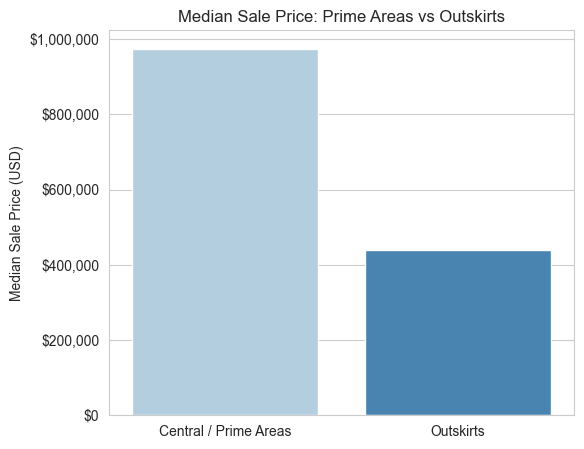

In [64]:
import matplotlib.ticker as mtick

plt.figure(figsize=(6,5))
sns.barplot(
    data=geo_summary,
    x="area",
    y="median_price",
    palette="Blues"
)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title("Median Sale Price: Prime Areas vs Outskirts")
plt.xlabel("")
plt.ylabel("Median Sale Price (USD)")
plt.show()



Homes located in prime ZIP codes sell for significantly higher median prices
prices and price per square foot than homes in outskirt areas,
confirming a strong geographical price premium.


## Key Insights

### Insight 1: Living area is the strongest driver of price
Sale price increases consistently with living area. Larger homes
command significantly higher prices, confirming that square footage
is the primary driver of value.

### Insight 2: Bedroom count has diminishing returns
While homes with more bedrooms are generally more expensive, price
gains plateau beyond 4 bedrooms when controlling for living area.
Additional bedrooms alone do not substantially increase value.

### Insight 3 (Geographical): Location drives a strong price premium
Homes in prime ZIP codes (98039, 98004, 98040, 98112, 98005) sell for
significantly higher prices and price per square foot than homes in
outskirt areas, highlighting the importance of location.


## Recommendations for Amy Williams (Seller)

### Recommendation 1: Prioritize selling prime-location properties
Properties in high-value ZIP codes command substantial price premiums.
Amy should prioritize selling prime-location homes to maximize profits
when capital needs are highest.

### Recommendation 2: Focus renovations on size and quality, not bedrooms
Renovations that increase usable living area or improve overall quality
(e.g., kitchens, finishes) are more effective than adding bedrooms,
which show diminishing returns.

### Recommendation 3: Use outskirt properties for gradual, low-profile sales
Outskirt homes sell at lower but more stable prices. These properties
can be sold gradually over time to generate income without attracting
attention through unusually high transaction values.
